# Stroke Prediction by Machine Learning
Saurabh Biswas

DSC680-T301

Stroke is the one of the leading causes of death according to the World Health Organization (WHO) and CDC data. According to WHO, almost 11% of total deaths are caused by stroke. CDC data suggests that, in United States, someone has a stroke in every 40sec, and one person dies in every 4 minutes because of stroke. From these statistics, we can understand stroke is a major health issue around the world.

The aim of this project is to build an effective model to detect high risk patients who have more chances of having stroke. They can take proper precaution and address the concerns and avoid this dangerous health problem.

In [161]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, average_precision_score, auc, precision_recall_curve, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.pipeline import Pipeline
import joblib
import pandas_profiling as pp
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
%matplotlib inline
seed = 824

In [2]:
# read file and load into a dataframe
df1 = pd.read_csv('healthcare-dataset-stroke-data.csv')
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df1["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [4]:
df1["ever_married"].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [5]:
df1["work_type"].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [6]:
df1["Residence_type"].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [7]:
df1["smoking_status"].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [8]:
change_cat = {"gender":     {"Male": '1', "Female": '2'},
              "ever_married": {"Yes": '1', "No": '0'},
              "work_type": {"Private": '1', "Self-employed": '2', "children": '3',
                            "Govt_job": '4', "Never_worked" : '5'},
              "Residence_type": {"Urban": '1', "Rural": '2'},
              "smoking_status": {"never smoked": '1', "Unknown": '2', "formerly smoked": '3',
                               "smokes": '4'}
             }

In [9]:
df1 = df1.replace(change_cat)
df1.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.6,3,1
1,51676,2,61.0,0,0,1,2,2,202.21,NaN,1,1
2,31112,1,80.0,0,1,1,1,2,105.92,32.5,1,1
3,60182,2,49.0,0,0,1,1,1,171.23,34.4,4,1
4,1665,2,79.0,1,0,1,2,2,174.12,24.0,1,1


In [10]:
profile = pp.ProfileReport(df1)
profile.to_file("output.html")

In [17]:
x_class = df1['stroke'].value_counts()
print(x_class)

0    4861
1     249
Name: stroke, dtype: int64


In [18]:
print('Patients with Stroke are: {0:.2f} %'.format((x_class[1]/len(df1))*100))
print('Patients with no Stroke are: {0:.2f} %'.format((x_class[0]/len(df1))*100))

Patients with Stroke are: 4.87 %
Patients with no Stroke are: 95.13 %


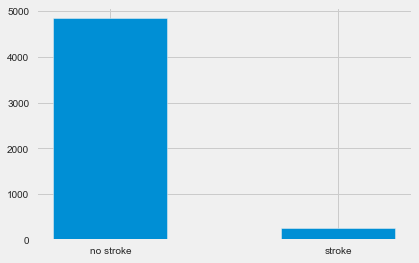

In [30]:
plt.bar(x=['no stroke', 'stroke'], height = x_class, width = 0.5)
plt.show()

In [17]:
# fill the missing values
df1['bmi'] = df1['bmi'].fillna(df1['bmi'].mean())

In [18]:
# check for null values again
df1.isna().sum() 

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [19]:
df2=df1.drop(['id'], axis=1)

In [20]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.600000,3,1
1,2,61.0,0,0,1,2,2,202.21,28.893237,1,1
2,1,80.0,0,1,1,1,2,105.92,32.500000,1,1
3,2,49.0,0,0,1,1,1,171.23,34.400000,4,1
4,2,79.0,1,0,1,2,2,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,2,80.0,1,0,1,1,1,83.75,28.893237,1,0
5106,2,81.0,0,0,1,2,1,125.20,40.000000,1,0
5107,2,35.0,0,0,1,2,2,82.99,30.600000,1,0
5108,1,51.0,0,0,1,1,2,166.29,25.600000,3,0


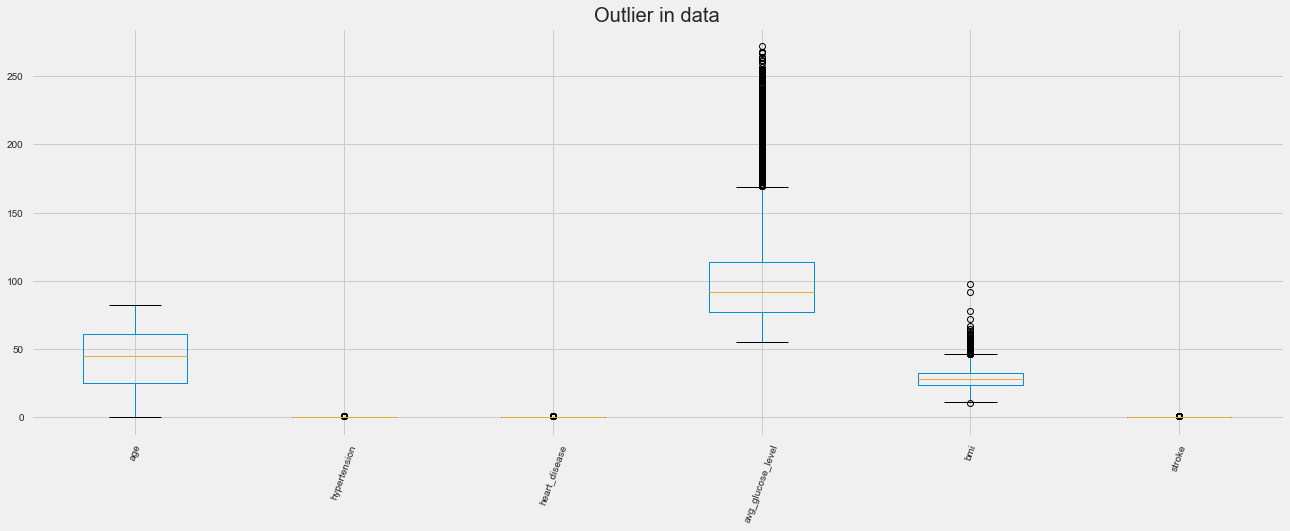

In [21]:
plt.style.use('fivethirtyeight')
outlier= df2.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier in data');

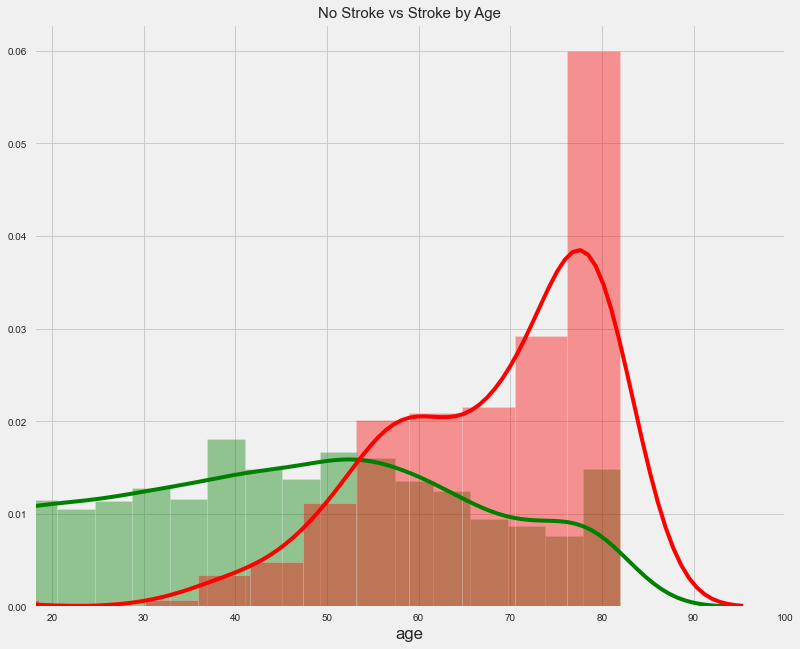

In [22]:
# Stroke v/s Age
plt.figure(figsize=(12,10))

sns.distplot(df2[df2['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(df2[df2['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()

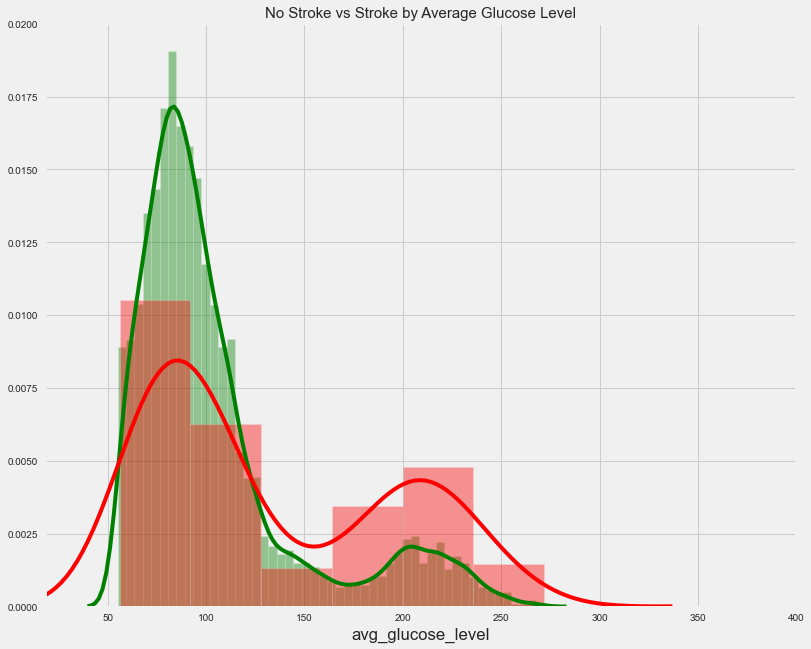

In [23]:
# Stroke v/s glucose level
plt.figure(figsize=(12,10))

sns.distplot(df2[df2['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(df2[df2['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Average Glucose Level', fontsize=15)
plt.xlim([18,400])
plt.show()

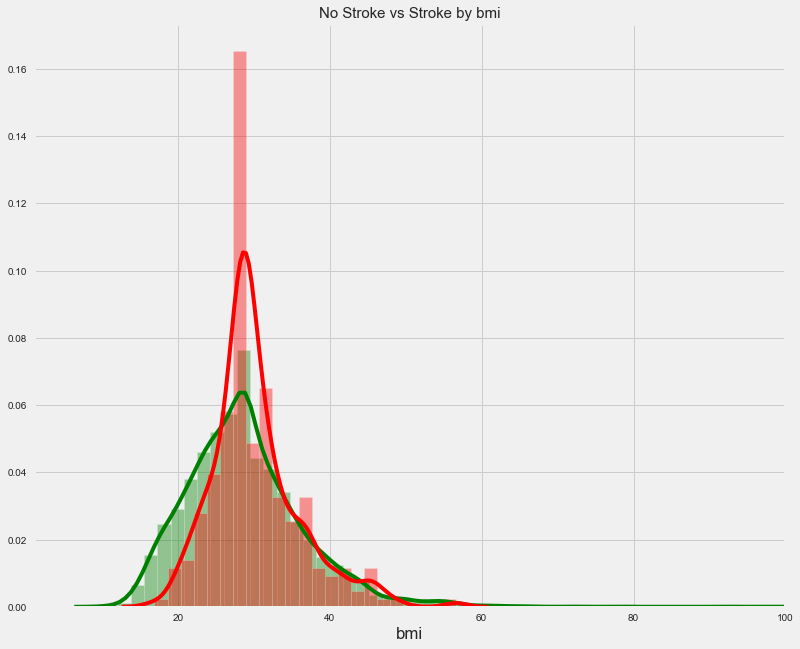

In [25]:
# Stroke v/s bmi
plt.figure(figsize=(12,10))

sns.distplot(df2[df2['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(df2[df2['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by bmi', fontsize=15)
plt.xlim([1,100])
plt.show()

In [46]:
temp_df1= df2[df2.stroke == 1]   # no stroke
temp_df0= df2[df2.stroke == 0]   # stroke

In [47]:
# prior to removing stroke outlier
temp_df1.shape

(249, 11)

In [49]:
# We will consider outlier is zscore is > 3 or < -3 and remove all of them
zscore_glucose = stats.zscore(temp_df1.avg_glucose_level) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_glucose) < 3)] # drop rows with zscore > 3 or < -3

zscore_bmi = stats.zscore(temp_df1.bmi) # calculate zscore 
temp_df1 = temp_df1[(abs(zscore_bmi) < 3)] # drop rows with zscore > 3 or < -3

# prior to removing stroke outlier
temp_df1.shape

(247, 11)

In [50]:
# prior to removing no-stroke outlier
temp_df0.shape

(4861, 11)

In [51]:
# We will consider outlier is zscore is > 3 or < -3 and remove all of them
zscore_glucose = stats.zscore(temp_df0.avg_glucose_level) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_glucose) < 3)] # drop rows with zscore > 3 or < -3

zscore_bmi = stats.zscore(temp_df0.bmi) # calculate zscore 
temp_df0 = temp_df0[(abs(zscore_bmi) < 3)] # drop rows with zscore > 3 or < -3

# prior to removing no-stroke outlier
temp_df0.shape

(4743, 11)

In [52]:
df3 = pd.concat([temp_df1, temp_df0], axis=0, sort=False)  # concatenate both Classes
df3.shape

(4990, 11)

In [53]:
# hot encoding
X = df3.drop('stroke', axis=1)  # get only independent variables
y = df3['stroke']  # get output variable

num_cols = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_cols = X.select_dtypes(include = ['object']).columns.to_list()

In [54]:
def label_encoder(df):
    for i in cat_cols:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

In [55]:
# robust scaler
rs = RobustScaler()
X[num_cols] = rs.fit_transform(X[num_cols])

# Label encoding
X = label_encoder(X)

X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,0.638889,0.0,1.0,1,0,0,3.845550,0.932584,2
1,1,0.472222,0.0,0.0,1,1,1,3.103294,0.066656,0
2,0,1.000000,0.0,1.0,1,0,1,0.404205,0.471910,0
3,1,0.138889,0.0,0.0,1,0,0,2.234898,0.685393,3
4,1,0.972222,1.0,0.0,1,1,1,2.315907,-0.483146,0


In [231]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=seed)

In [232]:
# over sample the minority class
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [233]:
# Output class count after oversampling
y_class = y_train_balanced.value_counts()
print(y_class)

1    3557
0    3557
Name: stroke, dtype: int64


In [201]:
params = {'n_estimators': [50, 100, 150, 200],
          'max_depth': [10,20,30,40,50],
          'max_features': ['sqrt', 'log2'],
          'class_weight': ['balanced', None],
           'bootstrap': [True, False]}


rf_grid = GridSearchCV(RandomForestClassifier(random_state=seed),
                       param_grid=params,
                       scoring={'avr': make_scorer(average_precision_score, needs_proba=True),
                                'll': make_scorer(log_loss, greater_is_better=False, needs_proba=True)},
                       n_jobs=-1,
                       cv=5,
                       refit='avr')

In [202]:
rf_grid.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=824),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', None],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             refit='avr',
             scoring={'avr': make_scorer(average_precision_score, needs_proba=True),
                      'll': make_scorer(log_loss, greater_is_better=False, needs_proba=True)})

In [203]:
rf_file = 'rf_model.sav'  # file name to store RF model
joblib.dump(rf_grid, rf_file)  # stores the model

['rf_model.sav']

In [204]:
rf_grid.best_score_, rf_grid.best_params_

(0.9908656709722716,
 {'bootstrap': False,
  'class_weight': None,
  'max_depth': 40,
  'max_features': 'sqrt',
  'n_estimators': 200})

In [205]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

predictions = rf_grid.predict_proba(X_train_balanced)[:, 1]
binned_true_p, binned_predict_p = calibration_curve(y_train_balanced, predictions, n_bins=10)

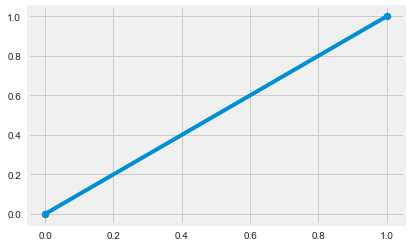

In [206]:
plt.scatter(binned_true_p, binned_predict_p)
m, b = np.polyfit(binned_true_p, binned_predict_p, 1)
plt.plot(binned_true_p, m*binned_true_p + b)
plt.show()

Predicted probabilty and actual predicted value are close. So, no calibration is required.

In [92]:
lr_pipeline = Pipeline([('select_best', SelectKBest()),
                        ('logistic', LogisticRegression(class_weight='balanced', random_state=seed))])

params = {'logistic__C': [0.1, 1.0, 10.0],
          'select_best__k': [3,5,7,9,'all']}
lr_grid = GridSearchCV(lr_pipeline,
                       param_grid=params,
                       scoring={'avr': make_scorer(average_precision_score, needs_proba=True),
                                'll': make_scorer(log_loss, greater_is_better=False, needs_proba=True)},
                       n_jobs=-1,
                       cv=5,
                       refit='avr')

In [93]:
lr_grid.fit(X_train_balanced, y_train_balanced)
lr_file = 'lr_model.sav'  # file name to store LR model
joblib.dump(lr_grid, lr_file)  # stores the model

['lr_model.sav']

In [94]:
lr_grid.best_score_, lr_grid.best_params_

(0.8183367435925415, {'logistic__C': 0.1, 'select_best__k': 'all'})

In [207]:
params = [{'solver': ['lbfgs'],
           'max_iter': [100, 200, 300]},
          {'solver': ['sgd'],
           'max_iter': [100, 200, 300],
           'learning_rate_init': [0.001,0.01,1]},
          {'solver': ['adam'],
           'max_iter': [100, 200, 300],
           'learning_rate_init': [0.001,0.01,1]}]

ann_grid = GridSearchCV(MLPClassifier(random_state=seed),
                       param_grid=params,
                       scoring={'avr': make_scorer(average_precision_score, needs_proba=True),
                                'll': make_scorer(log_loss, greater_is_better=False, needs_proba=True)},
                       n_jobs=-1,
                       cv=5,
                       refit='avr')

In [208]:
ann_grid.fit(X_train_balanced, y_train_balanced)
ann_file = 'ann_model.sav'  # file name to store svc model
joblib.dump(ann_grid, ann_file)  # stores the model

['ann_model.sav']

In [209]:
ann_grid.best_score_, ann_grid.best_params_

(0.9533402233756505,
 {'learning_rate_init': 0.01, 'max_iter': 300, 'solver': 'adam'})

In [135]:
# Convert to np array for modeling
X_train_balanced_arr = np.array(X_train_balanced)
X_test_arr = np.array(X_test)
y_train_balanced_arr = np.array(y_train_balanced)
y_test_arr = np.array(y_test)

In [153]:
dnn_model = Sequential()
#add input layer
dnn_model.add(Dense(input_dim = 10, units = 16, activation = 'relu'))
#add 2nd hidden layer
dnn_model.add(Dense(units = 24, activation = 'relu'))
#add dropout layer
dnn_model.add(Dropout(0.5))
#add 3rd hidden layer
dnn_model.add(Dense(units = 20, activation = 'relu'))
#add 4th hidden layer
dnn_model.add(Dense(units = 24, activation = 'relu'))
#add ouptut layer
dnn_model.add(Dense(units = 1, activation = 'sigmoid'))

In [154]:
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_16 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_18 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 25        
Total params: 1,613
Trainable params: 1,613
Non-trainable params: 0
____________________________________________________

In [155]:
dnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
dnn_grid = dnn_model.fit(X_train_balanced_arr, y_train_balanced_arr, batch_size = 15, epochs = 10, validation_data=(X_test_arr, y_test_arr))

Epoch 1/10
475/475 [==============================] - 0s 899us/step - loss: 0.5598 - accuracy: 0.7066 - val_loss: 0.4515 - val_accuracy: 0.7003
Epoch 2/10
475/475 [==============================] - 0s 662us/step - loss: 0.4652 - accuracy: 0.7838 - val_loss: 0.4947 - val_accuracy: 0.6771
Epoch 3/10
475/475 [==============================] - 0s 705us/step - loss: 0.4457 - accuracy: 0.7987 - val_loss: 0.4358 - val_accuracy: 0.7139
Epoch 4/10
475/475 [==============================] - 0s 698us/step - loss: 0.4314 - accuracy: 0.8018 - val_loss: 0.4337 - val_accuracy: 0.7163
Epoch 5/10
475/475 [==============================] - 0s 701us/step - loss: 0.4155 - accuracy: 0.8163 - val_loss: 0.4464 - val_accuracy: 0.7212
Epoch 6/10
475/475 [==============================] - 0s 697us/step - loss: 0.4106 - accuracy: 0.8143 - val_loss: 0.3974 - val_accuracy: 0.7508
Epoch 7/10
475/475 [==============================] - 0s 699us/step - loss: 0.3995 - accuracy: 0.8212 - val_loss: 0.3903 - val_accuracy:

In [234]:
# get f1 matrix after predicting the test set
y_pred = rf_grid.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['no-stroke', 'stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   no-stroke       0.96      0.94      0.95      1186
      stroke       0.14      0.18      0.16        62

    accuracy                           0.91      1248
   macro avg       0.55      0.56      0.55      1248
weighted avg       0.92      0.91      0.91      1248



In [235]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1119,   67],
       [  51,   11]])

In [236]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.905448717948718
0.14102564102564102
0.1774193548387097
0.15714285714285714


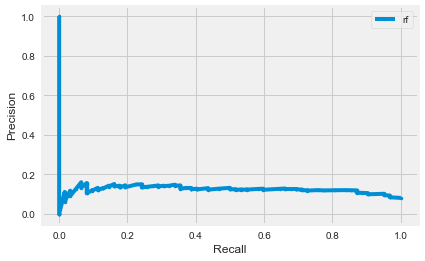

In [237]:
# plot precision recall curve
# predict probabilities
yhat = rf_grid.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='rf')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [238]:
average_precision = average_precision_score(y_test, pos_probs)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.13
